In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import csv
import pandas as pd
import awkward as ak
from matplotlib.ticker import ScalarFormatter
import ipywidgets as widgets
from IPython.display import display

In [ ]:
file = uproot.open("P16_test_LAPPD2_182000.root")
tree = file["VirtualDetector"]
with open("PDGid.csv", "r") as f:
    raw = f.read().strip(',')

tokens = raw.split(',')
pairs = {tokens[i]: float(tokens[i+1]) for i in range(0, len(tokens), 2)}



In [17]:
tree.keys()

['MT4TGT;1',
 'MT5TGT2;1',
 'MT5TGT;1',
 'MT4FP;1',
 'mt4q4d;1',
 'HC2det;1',
 'MT5FP1;1',
 'Det5M;1',
 'MT5DE;1',
 'MT5DF;1',
 'LAPPD1;1',
 'MT5FP2;1',
 'DetC;1',
 'MT6FP;1',
 'LAPPD2;1',
 'MT6WC2;1',
 'MT6Z0;1',
 'MT6Exp;1']

In [18]:
mt4tgt = tree["MT4TGT"]
print(mt4tgt.keys())
print(pairs)





['x', 'y', 'z', 'Px', 'Py', 'Pz', 't', 'PDGid', 'EventID', 'TrackID', 'ParentID', 'Weight']
{'B+': 521.0, 'B-': -521.0, 'B0': 511.0, 'Bs0': 531.0, 'D+': 411.0, 'D-': -411.0, 'D0': 421.0, 'Ds+': 431.0, 'Ds-': -431.0, 'GenericIon': 0.0, 'He3': 1000020030.0, 'J/psi': 443.0, 'N(1440)+': 12212.0, 'N(1440)0': 12112.0, 'N(1520)+': 2124.0, 'N(1520)0': 1214.0, 'N(1535)+': 22212.0, 'N(1535)0': 22112.0, 'N(1650)+': 32212.0, 'N(1650)0': 32112.0, 'N(1675)+': 2216.0, 'N(1675)0': 2116.0, 'N(1680)+': 12216.0, 'N(1680)0': 12116.0, 'N(1700)+': 22124.0, 'N(1700)0': 21214.0, 'N(1710)+': 42212.0, 'N(1710)0': 42112.0, 'N(1720)+': 32124.0, 'N(1720)0': 31214.0, 'N(1900)+': 42124.0, 'N(1900)0': 41214.0, 'N(1990)+': 12218.0, 'N(1990)0': 12118.0, 'N(2090)+': 52214.0, 'N(2090)0': 52114.0, 'N(2190)+': 2128.0, 'N(2190)0': 1218.0, 'N(2220)+': 100002210.0, 'N(2220)0': 100002110.0, 'N(2250)+': 100012210.0, 'N(2250)0': 100012110.0, 'a0(1450)+': 10211.0, 'a0(1450)-': -10211.0, 'a0(1450)0': 10111.0, 'a0(980)+': 9000211.0

In [19]:
py_mt4tgt = tree["MT4TGT"]["Py"].array(library="np")

<>:306: SyntaxWarning: invalid escape sequence '\p'
<>:306: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_4091/2162177577.py:306: SyntaxWarning: invalid escape sequence '\p'
  ax[0].set_xlabel("$\phi$ [rad]")


Output()

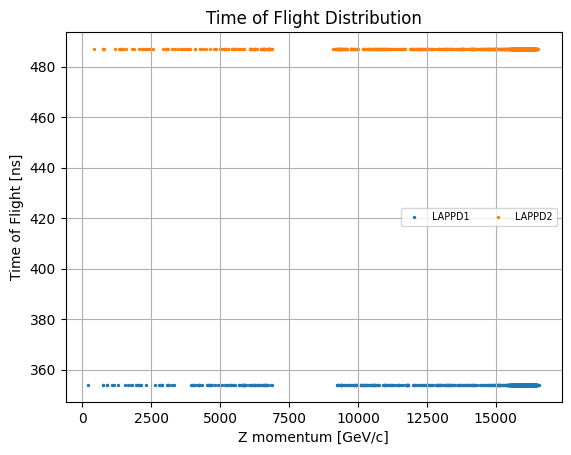

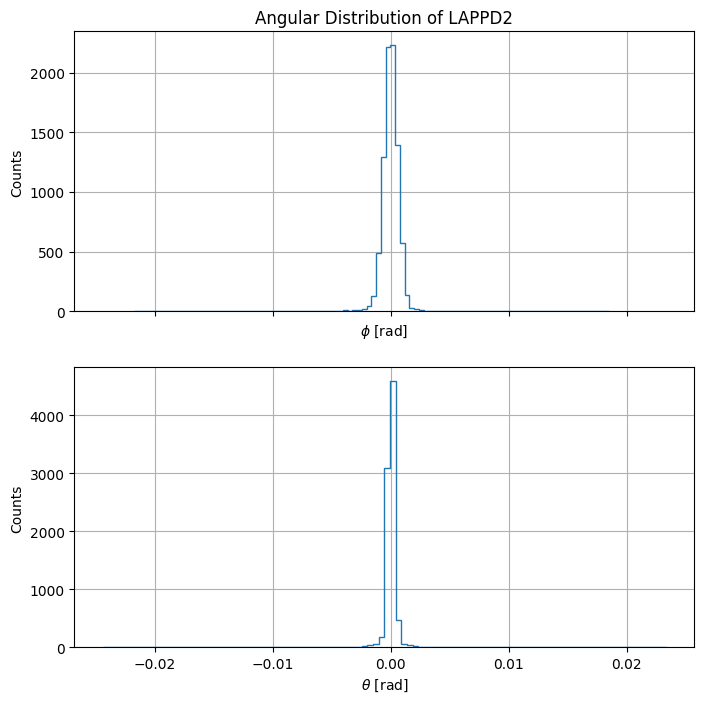

[WARNING] Some beta values exceed 1. Check for TOF or pairing issues.


/home/telva/miniconda3/envs/g4bl-env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


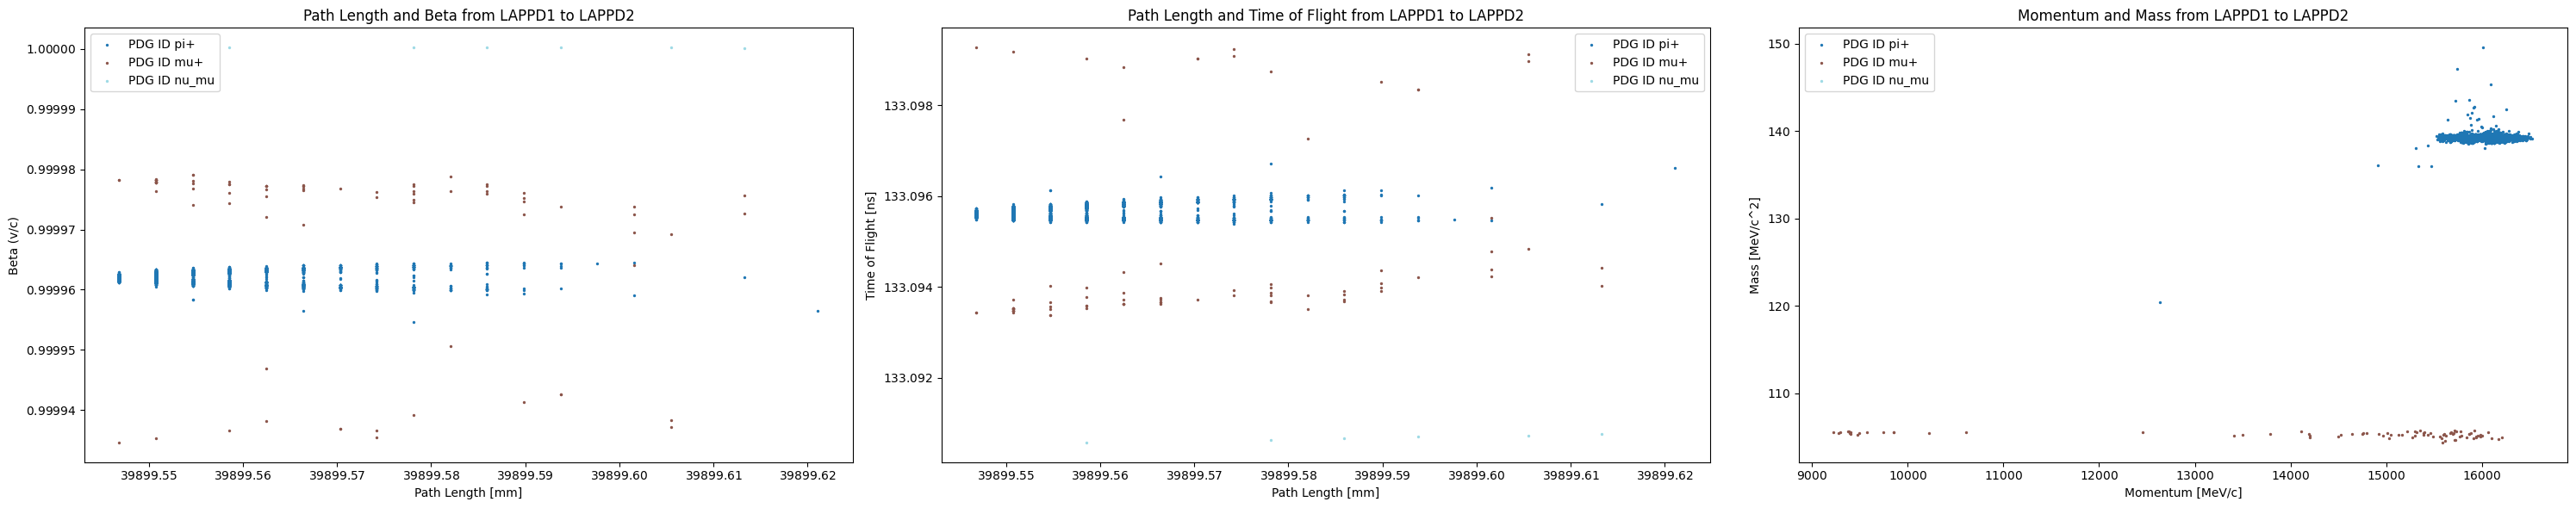

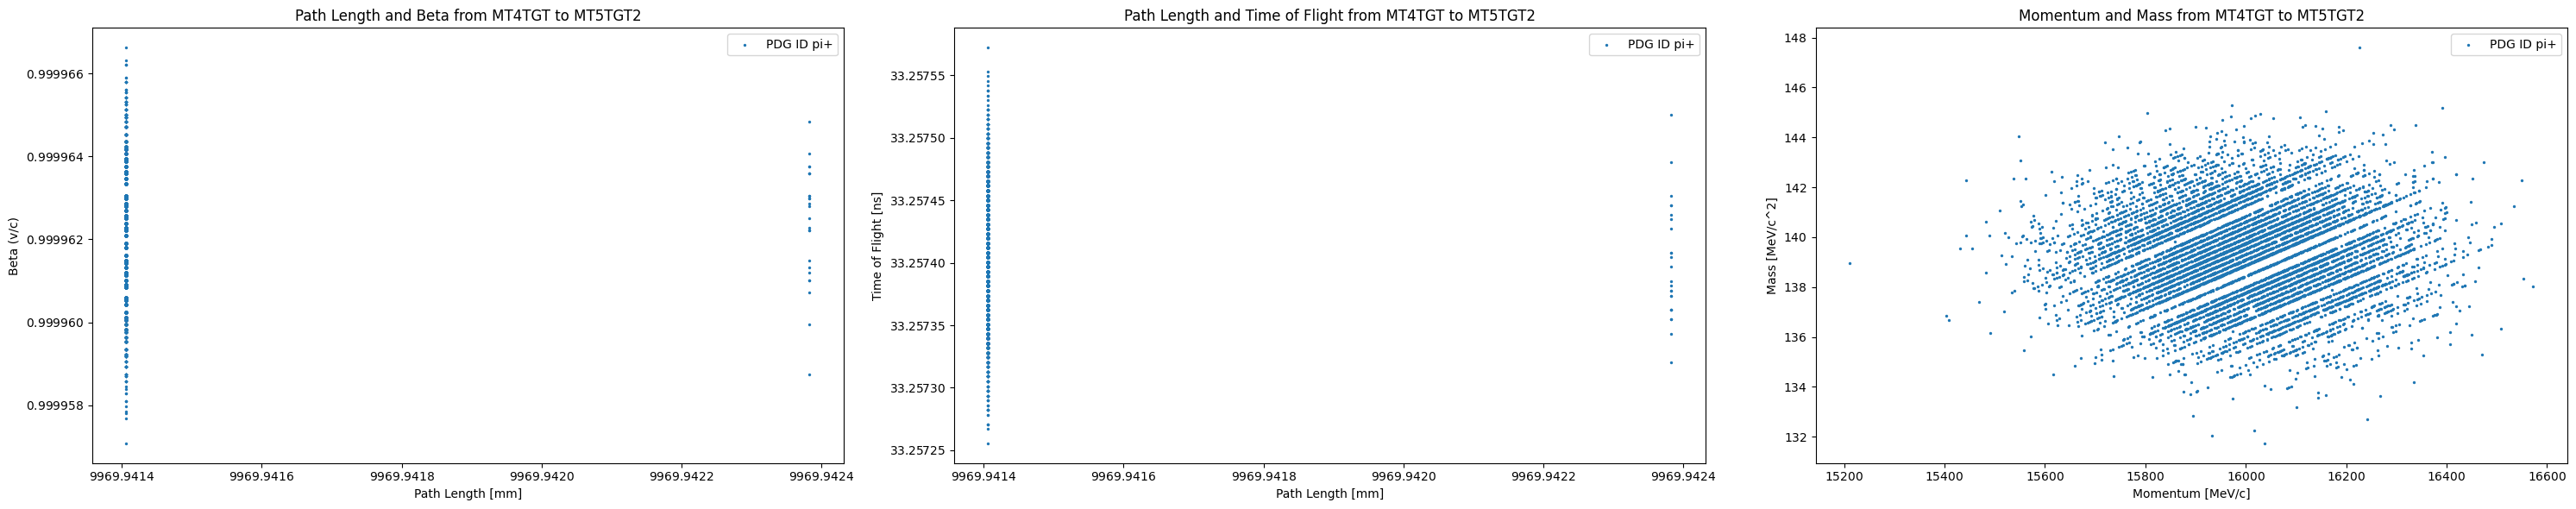

/home/telva/miniconda3/envs/g4bl-env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


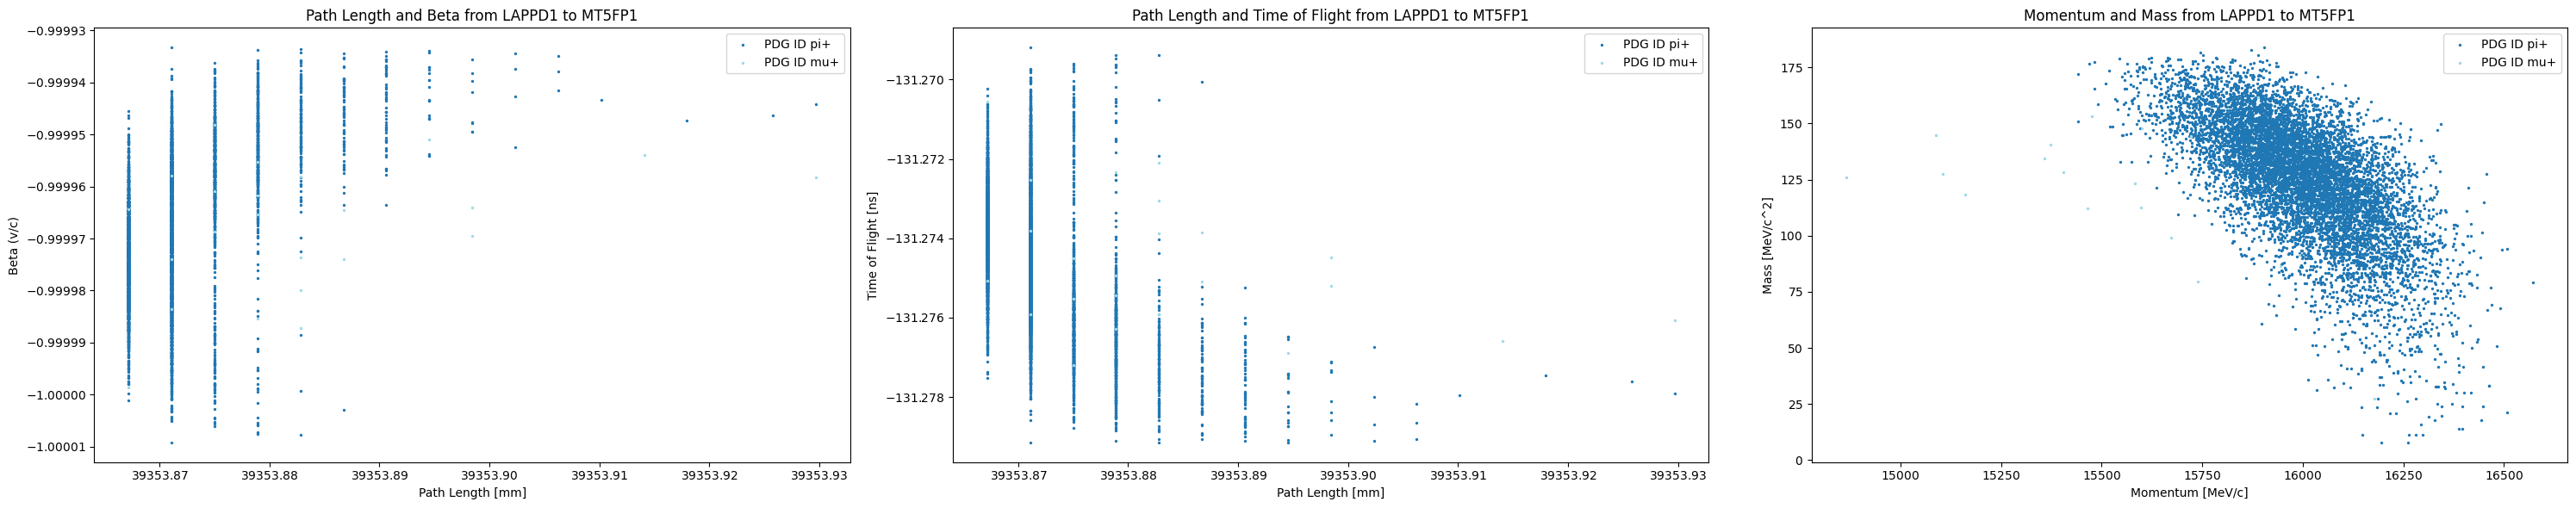

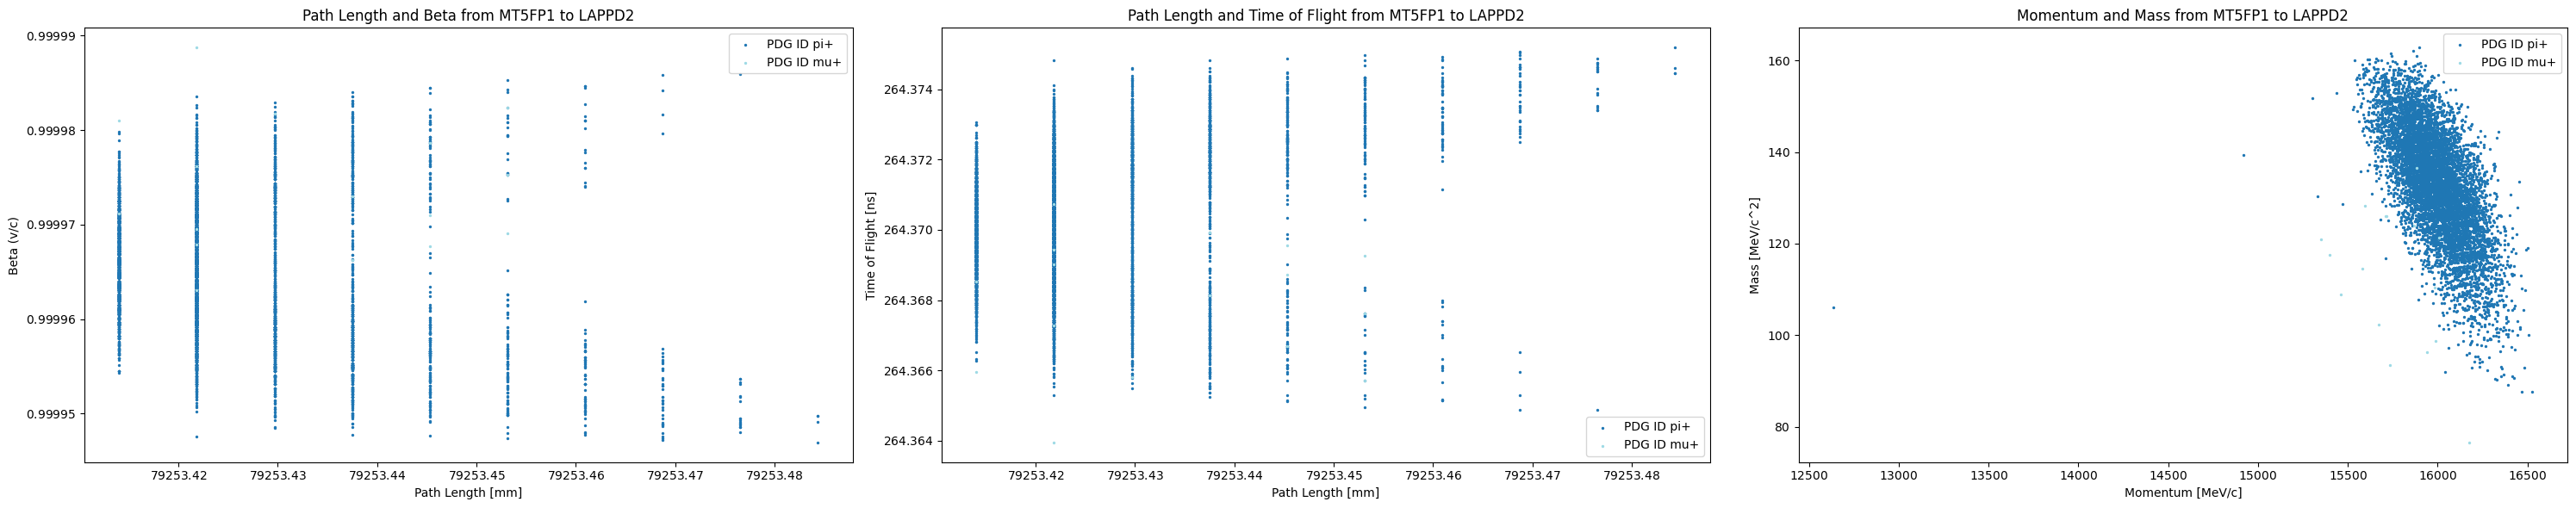

[WARNING] Some beta values exceed 1. Check for TOF or pairing issues.


/home/telva/miniconda3/envs/g4bl-env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


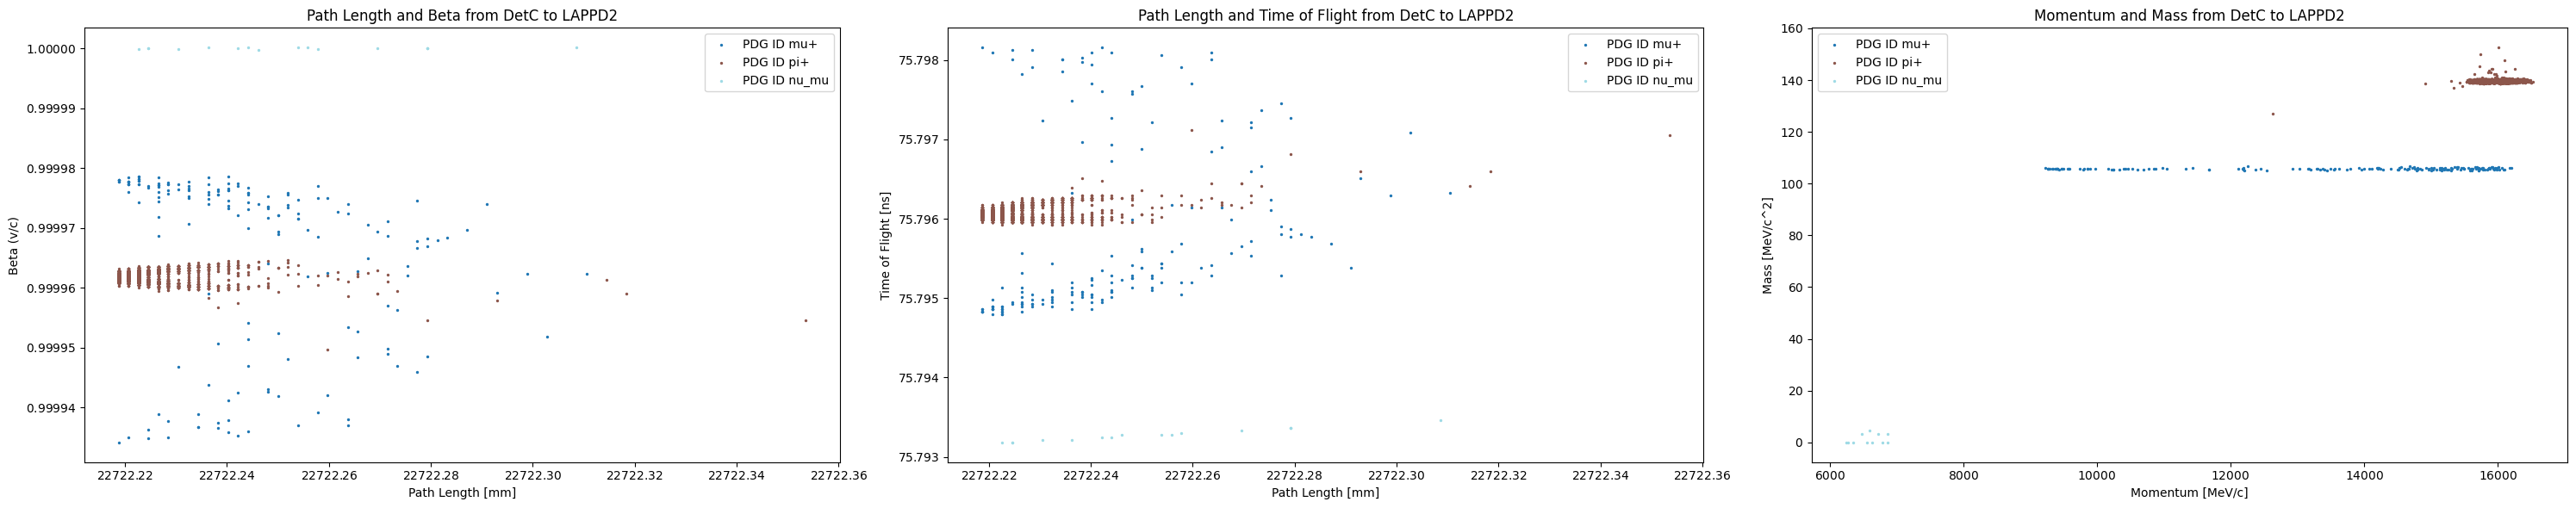

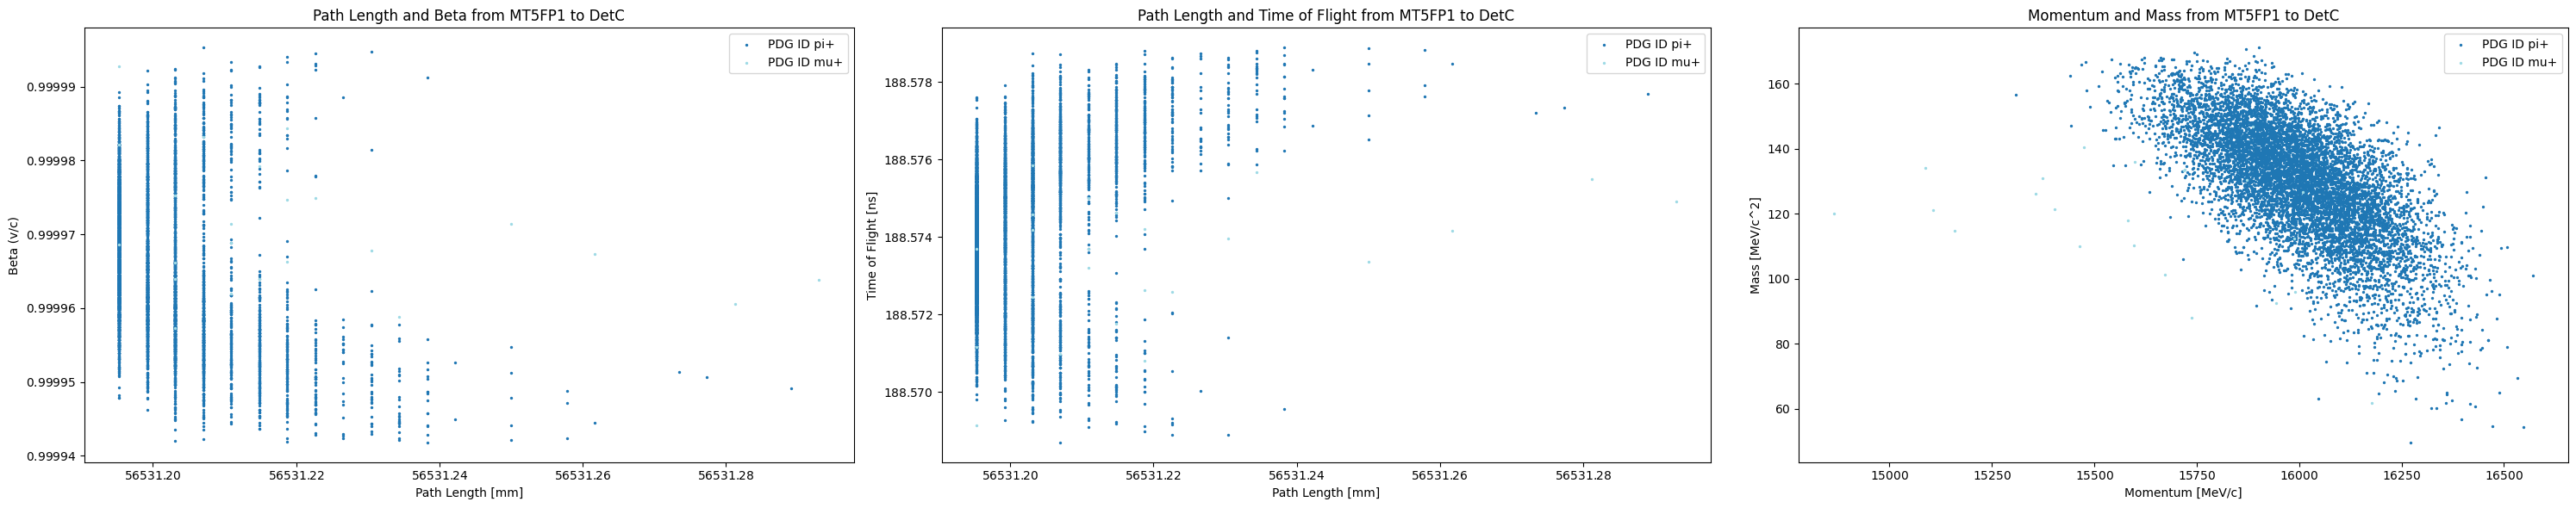

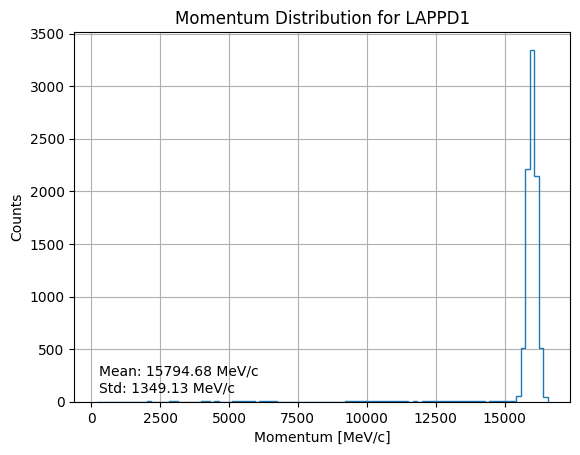

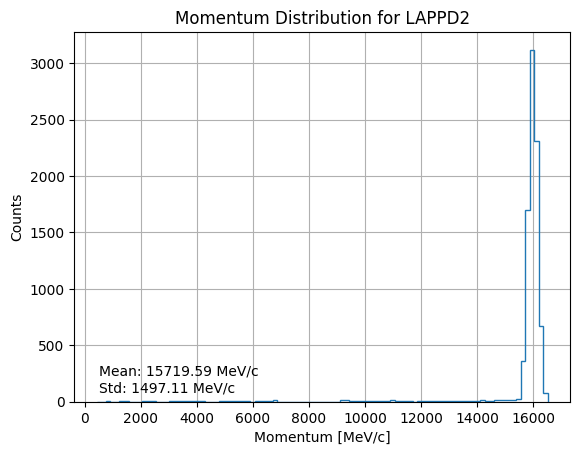

[WARNING] Some beta values exceed 1. Check for TOF or pairing issues.


/home/telva/miniconda3/envs/g4bl-env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


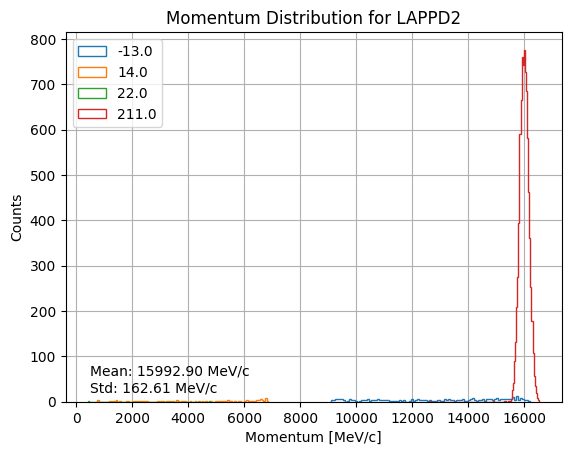

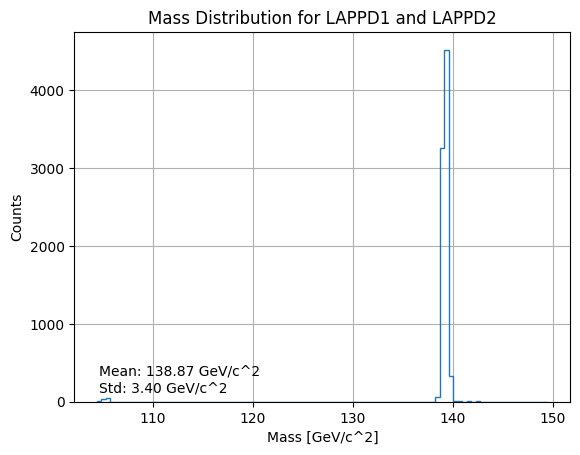

In [ ]:
detectors = [
        "MT4TGT",
        "MT5TGT2",
        "MT5TGT",
        "MT4FP",
        "mt4q4d",
        "HC2det",
        "MT5FP1",
        "Det5M",
        "MT5DE",
        "MT5DF",
        "LAPPD1",
        "MT5FP2",
        "DetC",
        "LAPPD2",
        "MT6FP",
        "MT6WC2",
        "MT6Z0",
        "MT6Exp"
    ]


vars = ['Weight', 't', 'x', 'y', 'z', 'Px', 'Py', 'Pz', 'PDGid', 'EventID', 'ParentID', 'TrackID']
unit = {"x":"mm","y":"mm","z":"mm", "Px": "MeV/c","Py": "MeV/c","Pz" : "MeV/c", "Weight" : "", "t" : "ns", "PDGid" : "", "EventID" : "", "ParentID" : "", "TrackID" : ""}

# c [mm/s]
C = 2.99792458*1e11

def parse_limits(text):
    try:
        return eval(text) if text else None
    except:
        return None
    



def plot_histogram_widget(var = 'x', detector= 'LAPPD1', xlim_str= '', ylim_str = ''):
    if detector in tree and var in tree[detector].keys():
        data = tree[detector][var].array(library="np")
        xlim = parse_limits(xlim_str)
        ylim = parse_limits(ylim_str)


        plt.hist(data, bins=50, histtype="step", label=detector)
        plt.title(f"{var} Distribution for {detector}")
        plt.xlabel(f"{var}[{unit.get(var, '')}]")
        plt.ylabel("Counts")
        plt.grid(True)

        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)

        plt.show()



# # Plotting histogram of given variable for all detectors
# def plot_histogram(key, xlim=None, ylim=None):
#     fig, ax = plt.subplots()
#     # with open('mean_stdev.csv', 'w', newline='') as file:
#     #     writer = csv.writer(file)
#     #     writer.writerow(["Variable", "Detector", "Mean", "Std Dev"])
#     for detector_name in detectors:
#         if detector_name in tree and key in tree[detector_name].keys():
#             detector = tree[detector_name]
#             data = detector[key].array(library="np")
#             # binwidth = 20
#             # mybins = np.arange(min(data), max(data)+1e-5, binwidth)
#             # ax.hist(data, bins = mybins, histtype="step", label=detector_name)
#             ax.hist(data, bins=50, histtype="step", label=detector_name)

#     ax.set_title(f"{key} Distribution")
#     ax.set_xlabel(f"{key}[{unit.get(key, '')}]")
#     ax.set_ylabel("Counts")
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)
#     ax.grid(True)
#     ax.legend(fontsize="x-small", ncol=2)

#     plt.show()


# plot_histogram_widget()



# write the file for variable mean and standard deviation for each detector
def mean_stdev_file():
    with open('mean_stdev.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Variable", "Detector", "Mean", "Std Dev"])
        for var in vars:
            for detector_name in detectors:
                if detector_name in tree and var in tree[detector_name].keys():
                    data = tree[detector_name][var].array(library="np")
                    writer.writerow([var, detector_name, np.mean(data), np.std(data)])

# Plotting time of flight distribution for LAPPD1 and LAPPD2
def time_of_flight():
    fig, ax = plt.subplots()
    for detector_name in ["LAPPD1","LAPPD2"]:
        detector = tree[detector_name]
        x = detector["Pz"].array(library="np")
        y = detector["t"].array(library="np")
        ax.scatter(x,y,s=2, label=detector_name)

    ax.set_title("Time of Flight Distribution")
    ax.set_xlabel("Z momentum [MeV/c]")
    ax.set_ylabel("Time of Flight [ns]")
    ax.grid(True)
    ax.legend(fontsize="x-small", ncol=2)
    plt.show()

# all the events in the detector
df = {}
for name in detectors:
    if name in tree:
        det = tree[name]
        # EventID can have multiple TrackID
        df[name] = ak.to_dataframe(ak.zip({
            "EventID": det["EventID"].array(),
            "TrackID": det["TrackID"].array(),
            "x": det["x"].array(),
            "y": det["y"].array(),
            "z": det["z"].array(),
            "t": det["t"].array(),
            "Px": det["Px"].array(),
            "Py": det["Py"].array(),
            "Pz": det["Pz"].array(),
            "PDGid": det["PDGid"].array()

        }))
        df[name] = df[name].set_index(["EventID", "TrackID"])

def concatenate_dataframes(detector_1, detector_2):
    df1 = df[detector_1]
    df2 = df[detector_2]
    # intersection of the two dataframes - inner
    paired = df1.join(df2, how = 'inner', lsuffix='_1', rsuffix = '_2')
    # print(paired.columns.tolist())

    # print(paired[["x_1", "y_1", "z_1","t_1", "x_2", "y_2", "z_2","t_2"]].head())
    delta = paired[["x_2", "y_2", "z_2"]].values - paired[["x_1", "y_1", "z_1"]].values
    paired["distance"] = np.linalg.norm(delta, axis=1)
    

    # time difference
    paired["Δt"] = paired["t_2"] - paired["t_1"]

    # beta = v/c = distance / Δt / c
    paired["beta"] = paired["distance"] / (paired["Δt"] * C * 1e-9) 
    # paired = paired[paired["beta"] <= 1].copy()
    # print(paired[["distance", "Δt", "beta"]])

    if (paired["beta"] > 1).any():
        print("[WARNING] Some beta values exceed 1. Check for TOF or pairing issues.")
        print(paired[paired["beta"] > 1][["PDGid_1","distance", "Δt", "beta"]])
    paired.to_csv("path_length.csv", sep='\t')
    return paired

# Calculating path length and beta between two detectors
def path_length(detector_1, detector_2):
    paired = concatenate_dataframes(detector_1, detector_2)

    fig, ax = plt.subplots(1,3, figsize=(30, 6))

    pdgid = paired["PDGid_2"].astype(int).unique()
    cmap = plt.get_cmap("tab20", len(pdgid))
    for i, pid in enumerate(pdgid):
        mask = paired["PDGid_2"] == pid
        pidname= list(pairs.keys())[list(pairs.values()).index(pid)]
        ax[0].scatter(paired[mask]["distance"], paired[mask]["beta"], s=2, color=cmap(i), label=f"{pidname}")
        ax[1].scatter(paired[mask]["distance"], paired[mask]["Δt"], s=2, color=cmap(i), label=f"{pidname}")
        p = np.sqrt((paired[mask]["Px_2"]**2 + (paired[mask]["Py_2"])**2 + (paired[mask]["Pz_2"])**2))
        m = np.sqrt((((paired[mask]["Δt"]*1e-9*C)/(paired[mask]["distance"]))**2-1)*p**2)
        ax[2].scatter(p, m, s=2, color=cmap(i), label=f"{pidname}")


    # ax[0].scatter(paired["distance"], paired["beta"], s=2, label=f"{detector_1} to {detector_2}")
    ax[0].set_title(f"Path Length and Beta from {detector_1} to {detector_2}")

    ax[0].set_xlabel("Path Length [mm]")
    ax[0].set_ylabel("Beta (v/c)")
    ax[0].legend()
    

    # ax[1].scatter(paired["distance"], paired["Δt"], s=2, label=f"{detector_1} to {detector_2}")
    ax[1].set_title(f"Path Length and Time of Flight from {detector_1} to {detector_2}")
    ax[1].set_xlabel("Path Length [mm]")
    ax[1].set_ylabel("Time of Flight [ns]")
    ax[1].legend()

    # print("mass of the particles:")
    p = np.sqrt((paired["Px_2"]**2 + (paired["Py_2"])**2 + (paired["Pz_2"])**2))
    # print(p)
    m = np.sqrt((((paired["Δt"]*1e-9*C)/(paired["distance"]))**2-1)*p**2)
    # print(m)

    # ax[2].scatter(p, m, s=2, label=f"{detector_1} to {detector_2}")
    ax[2].set_title(f"Momentum and Mass from {detector_1} to {detector_2}")
    ax[2].set_xlabel("Momentum [MeV/c]")
    ax[2].set_ylabel("Mass [$MeV/c^2$]")
    ax[2].legend()


    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_useOffset(False)

    ax[0].xaxis.set_major_formatter(formatter)
    ax[0].yaxis.set_major_formatter(formatter)
    ax[1].xaxis.set_major_formatter(formatter)
    ax[1].yaxis.set_major_formatter(formatter)
    ax[2].xaxis.set_major_formatter(formatter)
    ax[2].yaxis.set_major_formatter(formatter)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 211: pi+
# -13: mu+
# 14: nu_mu

def momentum_histogram(detector_name, xlim=None, ylim=None):
    fig, ax = plt.subplots()
    if detector_name in tree:
        px = tree[detector_name]["Px"].array(library="np")
        py = tree[detector_name]["Py"].array(library="np")
        pz = tree[detector_name]["Pz"].array(library="np")
        p = np.sqrt((px**2 + py**2 + pz**2))
        ax.hist(p, bins=100, histtype="step", label=detector_name)

    ax.set_title(f"Momentum Distribution for {detector_name}")
    ax.set_xlabel(f"Momentum [MeV/c]")
    ax.set_ylabel("Counts")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True)
    ax.text(0.05, 0.1, f"Mean: {np.mean(p):.2f} MeV/c\nStd: {np.std(p):.2f} MeV/c",verticalalignment='top', transform=ax.transAxes)

    plt.show()

# momentum distribution for each type of particle
def momentum_histogram_id(detector_name, xlim=None, ylim=None):
    fig, ax = plt.subplots()
    
    if detector_name in tree:
        pdg_ids = tree[detector_name]["PDGid"].array(library="np")
        px_m = tree[detector_name]["Px"].array(library="np")
        py_m = tree[detector_name]["Py"].array(library="np")
        pz_m = tree[detector_name]["Pz"].array(library="np")

        for id in np.unique(pdg_ids):
            pidname= list(pairs.keys())[list(pairs.values()).index(id)]
            mask = (pdg_ids == id)
            px = px_m[mask]
            py = py_m[mask]
            pz = pz_m[mask]
            p = np.sqrt((px**2 + py**2 + pz**2))
            ax.hist(p, bins=100, histtype="step", label= pidname)

    ax.set_title(f"Momentum Distribution for {detector_name}")
    ax.set_xlabel(f"Momentum [MeV/c]")
    ax.set_ylabel("Counts")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True)
    ax.legend()
    ax.text(0.05, 0.1, f"Mean: {np.mean(p):.2f} MeV/c\nStd: {np.std(p):.2f} MeV/c",verticalalignment='top', transform=ax.transAxes)



def mass_histogram(detector_1,detector_2, xlim=None, ylim=None):
    paired = concatenate_dataframes(detector_1, detector_2)
    fig, ax = plt.subplots()
    if detector_1 in tree and detector_2 in tree:
        p = np.sqrt((paired["Px_2"]**2 + (paired["Py_2"])**2 + (paired["Pz_2"])**2))
        m = np.sqrt((((paired["Δt"]*1e-9*C)/(paired["distance"]))**2-1)*p**2)
        ax.hist(m, bins=100, histtype="step", label=f"{detector_1} to {detector_2}")
    ax.set_title(f"Mass Distribution for {detector_1} and {detector_2}")
    ax.set_xlabel(f"Mass [$MeV/c^2$]")
    ax.set_ylabel("Counts")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True)
    ax.text(0.05, 0.1, f"Mean: {np.mean(m):.2f} $MeV/c^2$\nStd: {np.std(m):.2f} $MeV/c^2$",verticalalignment='top', transform=ax.transAxes)
    plt.show()

def angular_info(detector_name):
    fig, ax = plt.subplots(2,1, figsize=(8, 8), sharex=True)
    if detector_name in tree and "Py" in tree[detector_name].keys():
        detector = tree[detector_name]
        px = detector["Px"].array(library="np")
        py = detector["Py"].array(library="np")
        pz = detector["Pz"].array(library="np")
        theta = np.arctan2(py, pz)
        phi = np.arctan2(px, pz)
        ax[1].hist(theta, bins=100, histtype="step", label=detector_name)
        ax[0].hist(phi, bins=100, histtype="step", label=detector_name)


    ax[1].set_xlabel("$\\theta$ [rad]")
    ax[1].set_ylabel("Counts")
    ax[1].grid(True)

    ax[0].set_title(f"Angular Distribution of {detector_name}")
    ax[0].set_xlabel("$\phi$ [rad]")
    ax[0].set_ylabel("Counts")
    ax[0].grid(True)

    plt.show()

var_dropdown = widgets.Dropdown(options=vars, description='Variable:')
detector_dropdown = widgets.Dropdown(options=detectors, description='Detector:')
xlim_text = widgets.Text(value='', description='xlim:')
ylim_text = widgets.Text(value='', description='ylim:')

ui = widgets.VBox([
    var_dropdown,
    detector_dropdown,
    xlim_text,
    ylim_text
])

out = widgets.interactive_output(
    plot_histogram_widget,
    {
        "var": var_dropdown,
        "detector": detector_dropdown,
        "xlim_str": xlim_text,
        "ylim_str": ylim_text,
    }
)

display(ui, out)
mean_stdev_file()
time_of_flight()

angular_info("LAPPD2")
path_length("LAPPD1", "LAPPD2")
path_length("MT4TGT", "MT5TGT2")
path_length("LAPPD1","MT5FP1")
path_length("MT5FP1","LAPPD2")
path_length("DetC", "LAPPD2")
path_length("MT5FP1", "DetC")
momentum_histogram("LAPPD1")
momentum_histogram("LAPPD2")
momentum_histogram_id("LAPPD2")
mass_histogram("LAPPD1", "LAPPD2")


: 

: 